<a href="https://colab.research.google.com/github/AnesanR/Pytorch_Tutorials/blob/master/Pytorch_tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch
import numpy as np

In [0]:
import torch.nn as nn
import matplotlib.pyplot as plt
dtype= torch.float


In [0]:
#NN parameters
input_size=1
output_size=1
num_epochs=60
learning_rate=0.001

In [0]:
#dataset sing numpy arrays
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
[3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [0]:
#creating linear model
model= nn.Linear(input_size, output_size)

In [0]:
criterion= nn.MSELoss()
optimizer= torch.optim.SGD(model.parameters(), lr=learning_rate )

In [11]:
#we now train the model
for epoch in range(num_epochs):
  #convert arrays into torch tensors
  inputs= torch.from_numpy(x_train)
  targets=torch.from_numpy(y_train)
  
  #Forward pass
  outputs=model(inputs)
  loss=criterion(outputs, targets)
  
  #Backward and optimize
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
  if (epoch+1) % 5 == 0:
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/60], Loss: 1.4706
Epoch [10/60], Loss: 0.6964
Epoch [15/60], Loss: 0.3828
Epoch [20/60], Loss: 0.2557
Epoch [25/60], Loss: 0.2042
Epoch [30/60], Loss: 0.1834
Epoch [35/60], Loss: 0.1749
Epoch [40/60], Loss: 0.1715
Epoch [45/60], Loss: 0.1701
Epoch [50/60], Loss: 0.1696
Epoch [55/60], Loss: 0.1693
Epoch [60/60], Loss: 0.1692


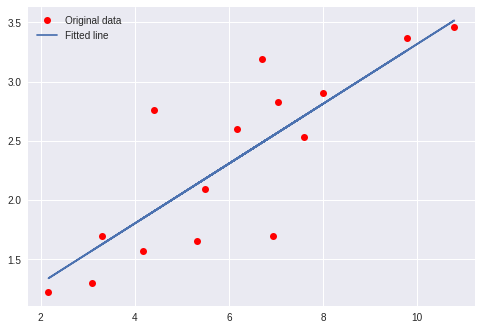

In [16]:
predicted=model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

#save the model
torch.save(model.state_dict, 'model.ckpt')